**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

Write a matrix  AA  that represents the same linear transformation. (4 points)

In [1]:
import numpy as np

In [2]:
v=np.array([[10,2,1],[-10,-5,-4],[16,20,13]])
e=np.array([[1,0,0],[0,1,0],[0,0,1]])

In [3]:
# since A @ e = v, then A = v @ inv(e)
A = v @ np.linalg.inv(e)
A

array([[ 10.,   2.,   1.],
       [-10.,  -5.,  -4.],
       [ 16.,  20.,  13.]])

Compute the rank of  A  using two different methods (do not use matrix_rank!). (4 points)

In [4]:
### method 1
# n = rank + null
from sympy import Matrix
A1=Matrix(A)
rank=A1.shape[1]-len(A1.nullspace())
print(rank)

3


In [5]:
### method 2
u, s, v = np.linalg.svd(A)
rank = np.sum(s > 1e-10)
print(rank)

3


In [6]:
### method 3
# rank = num of none zero eigenvalus
W,V=np.linalg.eig(A)
rank = np.sum(W > 1e-10)
print(rank)

3


In [7]:
### check results with np.linalg.matrix_rank
np.linalg.matrix_rank(A)

3

Find the eigenvalues and eigenvectors of  AA . (4 points)

In [8]:
W,V=np.linalg.eig(A)
print('eigenvalues = ',W)

eigenvalues =  [ 9.  3.  6.]


In [9]:
## eigenvectors
V

array([[  5.77350269e-01,   6.31950024e-16,  -1.20385853e-01],
       [ -5.77350269e-01,  -4.47213595e-01,  -2.40771706e-01],
       [  5.77350269e-01,   8.94427191e-01,   9.63086825e-01]])

In [10]:
v1=V[:,0]
v2=V[:,1]
v3=V[:,2]
print('eigenvalue:',W[0],'; eigenvector:',v1)
print('eigenvalue:',W[1],'; eigenvector:',v2)
print('eigenvalue:',W[2],'; eigenvector:',v3)

eigenvalue: 9.0 ; eigenvector: [ 0.57735027 -0.57735027  0.57735027]
eigenvalue: 3.0 ; eigenvector: [  6.31950024e-16  -4.47213595e-01   8.94427191e-01]
eigenvalue: 6.0 ; eigenvector: [-0.12038585 -0.24077171  0.96308682]


What is the matrix representation of  ff  with respect to the eigenbasis? (8 points)

In [11]:
mat = np.linalg.solve(np.linalg.eig(A)[1],A)
mat.T

array([[ 20.78460969, -13.41640786,  16.61324773],
       [ 10.39230485, -20.1246118 ,  33.22649545],
       [  5.19615242,  -6.70820393,  16.61324773]])

In [12]:
print('the matrix representaion of f(x) with respect to the eigenbasis can be expressed as:')
print(mat[0,:].reshape(3,1), "* w1 ")
print('+')
print(mat[1,:].reshape(3,1), "* w2 ")
print('+')
print(mat[2,:].reshape(3,1), "* w3 ")

the matrix representaion of f(x) with respect to the eigenbasis can be expressed as:
[[ 20.78460969]
 [ 10.39230485]
 [  5.19615242]] * w1 
+
[[-13.41640786]
 [-20.1246118 ]
 [ -6.70820393]] * w2 
+
[[ 16.61324773]
 [ 33.22649545]
 [ 16.61324773]] * w3 


**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

In [13]:
xs = np.array([
    [  0.        ,   4.12306991],
    [  3.        , -15.47355729],
    [  4.        , -11.68725507],
    [  3.        , -20.33756693],
    [  5.        ,  -6.06401989],
    [  6.        ,  32.79353057],
    [  8.        ,  82.48658405],
    [  9.        ,  84.02971858],
    [  4.        ,  -1.30587276],
    [  8.        ,  68.59409878]])

In [14]:
def func(x, a, b, c):
    return a + b*x + c*x*x

In [15]:
xdata=xs[:,0]
ydata=xs[:,1]

In [16]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata)
popt # the estimated a, b, c

array([ -0.35762896, -11.78531232,   2.53125199])

In [17]:
yfit=func(xdata, *popt)

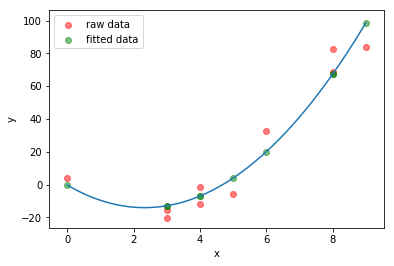

In [19]:
import matplotlib.pyplot as plt
# the red points are points in the raw data
# the green points are fitted points
# the blue line is fitted line
plt.scatter(xdata, ydata, c='red', alpha=0.5,label='raw data')
plt.scatter(xdata, yfit, c='green', alpha=0.5,label='fitted data')
xx = np.linspace(0,9,100)
yy = popt[2]*xx**2 + popt[1]*xx + popt[0]
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**3**. (20 points)

Use the `svd` function to solve the least squares problem above, and repeat the same plot. Calculate the residual error $\lvert y - X\beta \rvert$.

In [20]:
A=np.array(list(np.ones(len(xdata)))+list(xdata)+list(xdata**2)).reshape(3,len(xdata))
A=A.T
A

array([[  1.,   0.,   0.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,   4.,  16.],
       [  1.,   8.,  64.]])

In [21]:
u, s, v = np.linalg.svd(A)
beta = v.T @ np.c_[np.linalg.inv(np.diag(s)), np.zeros(7*3).reshape(3,7)] @ u.T @ ydata
beta # the estimated a, b, c

array([ -0.35762896, -11.78531232,   2.53125199])

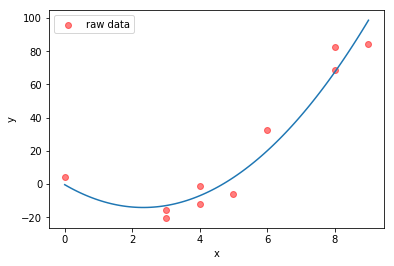

In [22]:
import matplotlib.pyplot as plt
# the red points are points in the raw data
# the blue line is fitted line
plt.scatter(xdata, ydata, c='red', alpha=0.5,label='raw data')
xx = np.linspace(0,9,100)
yy = beta[2]*xx**2 + beta[1]*xx + beta[0]
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [23]:
np.abs(A @ beta - ydata)

array([  4.48069887,   2.54125925,   4.68840861,   7.40526889,
        10.06112898,  12.73796195,  15.12658447,  14.57625244,
         5.6929737 ,   1.2340992 ])

**4**. (20 points) 

Avoiding catastrophic cancellation.

Read the Wikipedia entry on [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance). Then answer the following problem:

The tail of the standard logistic distribution is given by $1 - F(t) = 1 - (1+e^{-t})^{-1}$.

- Define a function `f1` to calculate the tail probability of the logistic distribution using the formula given above
- Use [`sympy`](http://docs.sympy.org/latest/index.html) to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits
- Calculate the *relative error* of `f1` when $t = 25$ (The relative error is given by `abs(exact - approximate)/exact`)
- Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function `f2` using this formula. Calculate the *relative error* of `f2` when $t = 25$. 
- How much more accurate is `f2` compared with `f1` in terms of the relative error?

In [24]:
import sympy

Q1: Define a function f1 to calculate the tail probability of the logistic distribution using the formula given above

In [25]:
def f1(t):
    f1=1-1/(1+np.exp(-t))
    return(f1)

Q2: Use sympy to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits

In [26]:
def f0(t):
    f0=sympy.N(1-1/(1+sympy.exp(-t)),20)
    return(f0)

Q3: Calculate the relative error of f1 when  t=25t=25  (The relative error is given by abs(exact - approximate)/exact)

In [27]:
exact=f0(25)
approx=f1(25)
relative_error=np.abs((exact-approx)/exact)
relative_error

4.1759147665982646285e-6

Q4: Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function f2 using this formula. Calculate the relative error of f2 when  t=25t=25 .


In [4]:
import numpy as np
1/(np.exp(25)+1)

1.3887943864771144e-11

In [5]:
def f2(t):
    f2=np.exp(-t)/(1+np.exp(-t))
    return(f2)

In [8]:
f2(25)

1.3887943864771146e-11

In [6]:
exact=f0(25)
approx2=f2(25)
relative_error2=np.abs((exact-approx2)/exact)
relative_error2

NameError: name 'f0' is not defined

Q5: How much more accurate is f2 compared with f1 in terms of the relative error?

In [30]:
relative_error/relative_error2

1806875123599.7465438

**5**. (20 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

In [1]:
from skimage import io
img = io.imread('figs/elephant.jpg', as_grey=True)

FileNotFoundError: [Errno 2] No such file or directory: 'figs/elephant.jpg'

In [32]:
import scipy.sparse.linalg 
import matplotlib.pyplot as plt

In [35]:
k = 1
a=1
while a:
    u, s, v = scipy.sparse.linalg.svds(img, k)
    A=u @ np.diag(s) @ v
    if np.var(A) > (np.var(img) * 0.995):
        a=0
    k += 1

In [36]:
k=k-1
k

158

In [37]:
u, s, v = scipy.sparse.linalg.svds(img, 158)
A=u @ np.diag(s) @ v

In [38]:
A

array([[ 0.1751828 ,  0.17532793,  0.17936893, ...,  0.21370902,
         0.21522053,  0.21177994],
       [ 0.17520919,  0.17591909,  0.17964196, ...,  0.21431063,
         0.21547293,  0.21162661],
       [ 0.17458847,  0.17589472,  0.17935701, ...,  0.21586281,
         0.21584101,  0.21163815],
       ..., 
       [ 0.64574139,  0.634374  ,  0.6352618 , ...,  0.60306447,
         0.59627018,  0.58810847],
       [ 0.65323139,  0.65108152,  0.65401417, ...,  0.60050738,
         0.58508802,  0.57334184],
       [ 0.64943004,  0.65001985,  0.65542358, ...,  0.58759695,
         0.56924365,  0.56179656]])

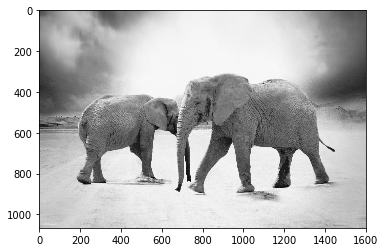

In [39]:
plt.imshow(A, cmap='Greys_r')
plt.show()

the relative size of the compressed image as a percentage

In [40]:
(u.shape[0]*u.shape[1] + v.shape[0]*v.shape[1] + len(s)) / (img.shape[0]*img.shape[1])

0.24706027204502815